In [1]:
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.metrics import *
import sklearn
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
warnings.simplefilter("ignore")
import os
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import neighbors

In [2]:
%cd /content/drive/MyDrive/GNN

/content/drive/MyDrive/GNN


# EDA

In [3]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.shape

(768, 9)

In [5]:
data.groupby('Outcome').Pregnancies.count()


Outcome
0    500
1    268
Name: Pregnancies, dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

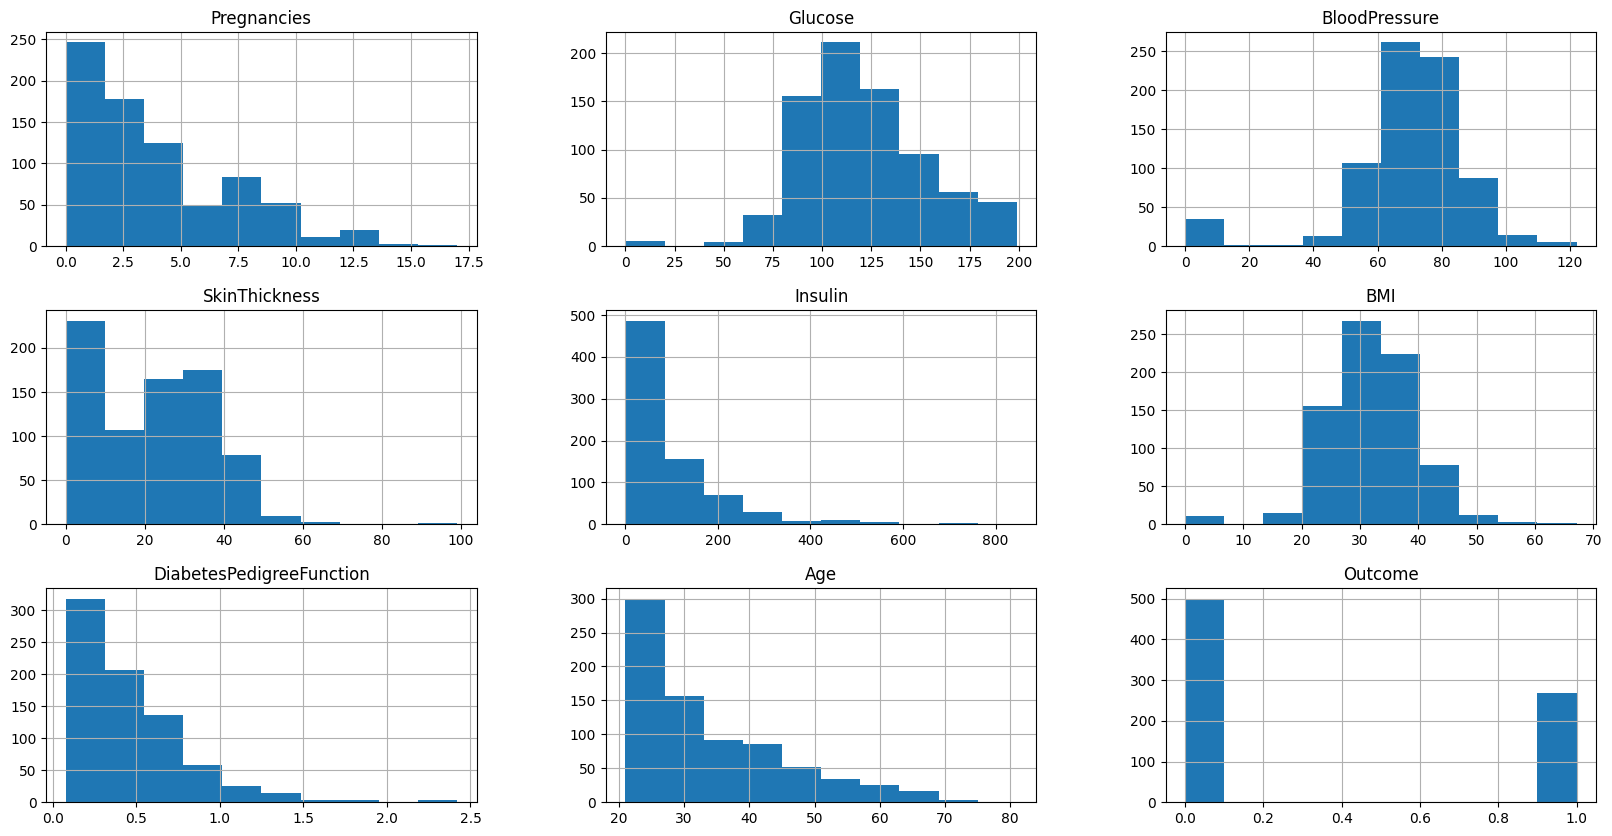

In [6]:
data.hist(figsize=(20,10))

<Axes: >

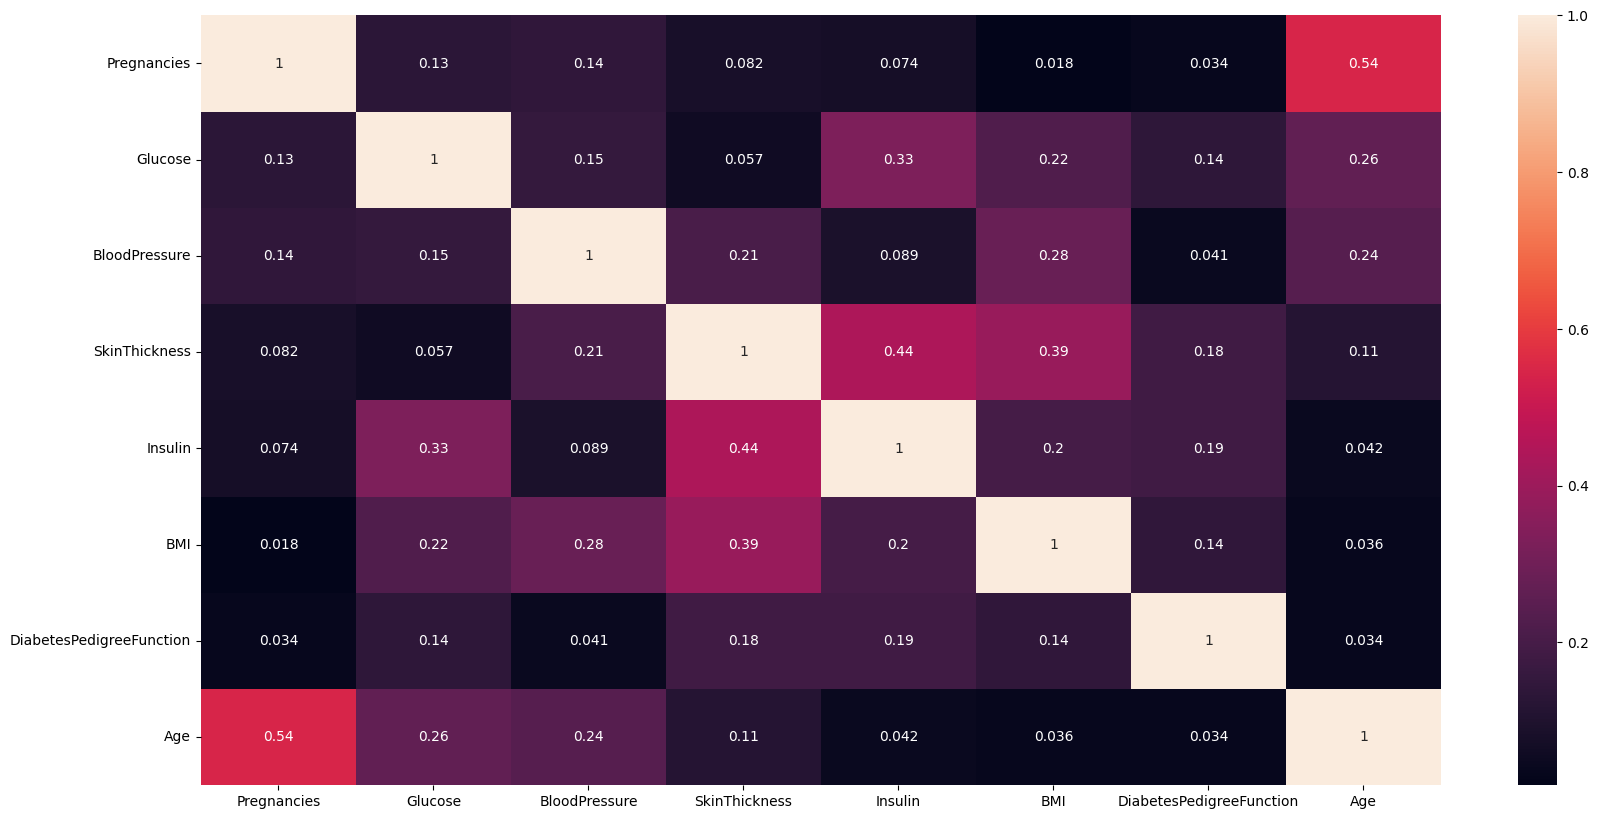

In [7]:

cor = data.drop('Outcome', axis = 1).corr().abs()
plt.subplots(figsize=(20, 10))
sns.heatmap(cor, annot = True)

<Axes: >

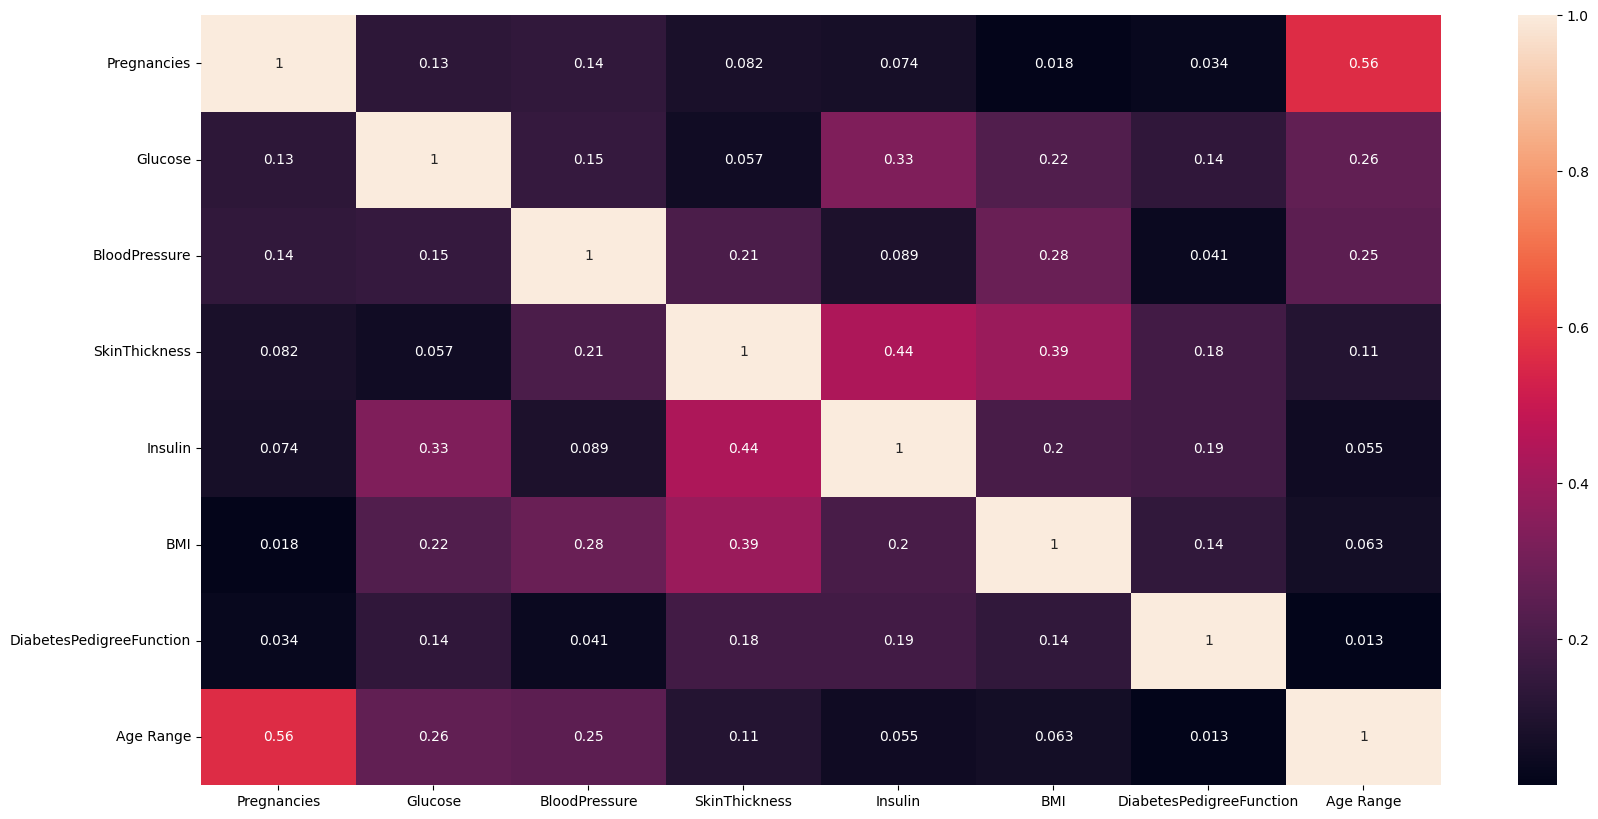

In [13]:
cor = data.drop('Outcome', axis = 1).corr().abs()
plt.subplots(figsize=(20, 10))
sns.heatmap(cor, annot = True)

\begin{table}[]
\begin{tabular}{lllll}
\hline
Model         & Trước khi binning & Sau khi binning &  &  \\ \hline
Decision Tree & 68\%              & 69\%            &  &  \\
XGBoost       & 75\%              & 75\%            &  &  \\
              &                   &                 &  &  \\ \hline
\end{tabular}
\end{table}

In [9]:
train, test = train_test_split(data, test_size = 0.2, random_state = 1)


In [ ]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
663,9,145,80,46,130,37.9,0.637,40,1
712,10,129,62,36,0,41.2,0.441,38,1
161,7,102,74,40,105,37.2,0.204,45,0
509,8,120,78,0,0,25.0,0.409,64,0
305,2,120,76,37,105,39.7,0.215,29,0
...,...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30,0
715,7,187,50,33,392,33.9,0.826,34,1
72,13,126,90,0,0,43.4,0.583,42,1
235,4,171,72,0,0,43.6,0.479,26,1


In [ ]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train.drop('Outcome', axis = 1), train.Outcome)
y_pred = clf.predict(test.drop('Outcome', axis = 1))
print(classification_report(test.Outcome, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(train.drop('Outcome', axis = 1), train.Outcome)
y_pred = tree.predict(test.drop('Outcome', axis = 1))
print(classification_report(test.Outcome, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        99
           1       0.56      0.53      0.54        55

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(train.drop('Outcome', axis = 1), train.Outcome)
y_pred = svm.predict(test.drop('Outcome', axis = 1))
print(classification_report(test.Outcome, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        99
           1       0.82      0.51      0.63        55

    accuracy                           0.79       154
   macro avg       0.80      0.72      0.74       154
weighted avg       0.79      0.79      0.77       154



In [ ]:
from xgboost import XGBClassifier


xgboost = XGBClassifier()
xgboost.fit(train.drop('Outcome', axis = 1), train.Outcome)
y_pred = xgboost.predict(test.drop('Outcome', axis = 1))
print(classification_report(test.Outcome, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        99
           1       0.67      0.60      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



# Binning

In [10]:

bins = [18, 25, 35, 45, 60, 80]
names = ['18 - 25', '25 - 35', '35 - 45', '45 - 60', '60 - 80']
data['Age Range'] = pd.cut(data['Age'], bins, labels = names, include_lowest = True)
le = LabelEncoder()
data['Age Range'] = le.fit_transform(data['Age Range'])
data['Age Range']

0      3
1      1
2      1
3      0
4      1
      ..
763    4
764    1
765    1
766    3
767    0
Name: Age Range, Length: 768, dtype: int64

In [11]:
data.drop(['Age'], axis=1, inplace=True)

In [12]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Age Range
0,6,148,72,35,0,33.6,0.627,1,3
1,1,85,66,29,0,26.6,0.351,0,1
2,8,183,64,0,0,23.3,0.672,1,1
3,1,89,66,23,94,28.1,0.167,0,0
4,0,137,40,35,168,43.1,2.288,1,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,0,4
764,2,122,70,27,0,36.8,0.340,0,1
765,5,121,72,23,112,26.2,0.245,0,1
766,1,126,60,0,0,30.1,0.349,1,3


# Test After Binning

In [ ]:
train, test = train_test_split(data, test_size = 0.2, random_state = 1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(train.drop('Outcome', axis = 1), train.Outcome)
y_pred = tree.predict(test.drop('Outcome', axis = 1))
print(classification_report(test.Outcome, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76        99
           1       0.57      0.56      0.57        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.69      0.69      0.69       154



In [ ]:
from xgboost import XGBClassifier


xgboost = XGBClassifier()
xgboost.fit(train.drop('Outcome', axis = 1), train.Outcome)
y_pred = xgboost.predict(test.drop('Outcome', axis = 1))
print(classification_report(test.Outcome, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.67      0.58      0.62        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



# Build Graph

In [ ]:
feature_names = set(data.drop('Outcome', axis = 1).columns)
num_features = len(feature_names)
num_classes = train.Outcome.nunique()

hidden_units = [64, 32]
learning_rate = 0.01
dropout_rate = 0.1
num_epochs = 300
batch_size = 256

In [ ]:
feature_names

{'Age Range',
 'BMI',
 'BloodPressure',
 'DiabetesPedigreeFunction',
 'Glucose',
 'Insulin',
 'Pregnancies',
 'SkinThickness'}

In [ ]:
data.reset_index(inplace = True)


In [ ]:
data

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Age Range
0,0,6,148,72,35,0,33.6,0.627,1,3
1,1,1,85,66,29,0,26.6,0.351,0,1
2,2,8,183,64,0,0,23.3,0.672,1,1
3,3,1,89,66,23,94,28.1,0.167,0,0
4,4,0,137,40,35,168,43.1,2.288,1,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,0,4
764,764,2,122,70,27,0,36.8,0.340,0,1
765,765,5,121,72,23,112,26.2,0.245,0,1
766,766,1,126,60,0,0,30.1,0.349,1,3


In [ ]:
train, test = train_test_split(data, test_size = 0.2, random_state = 1)

In [ ]:
test

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Age Range
285,285,7,136,74,26,135,26.0,0.647,0,3
101,101,1,151,60,0,0,26.1,0.179,0,0
581,581,6,109,60,27,0,25.0,0.206,0,1
352,352,3,61,82,28,0,34.4,0.243,0,3
726,726,1,116,78,29,180,36.1,0.496,0,0
...,...,...,...,...,...,...,...,...,...,...
563,563,6,99,60,19,54,26.9,0.497,0,1
318,318,3,115,66,39,140,38.1,0.150,0,1
154,154,8,188,78,0,0,47.9,0.137,1,2
684,684,5,136,82,0,0,0.0,0.640,0,4


# Build Model

In [ ]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []
    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

In [ ]:
ffn = create_ffn(hidden_units, dropout_rate)

In [ ]:
dummy = np.random.rand(10,10)
dummy.shape

(10, 10)

In [ ]:
dummy = ffn(tf.Variable(dummy))
update_fn = layers.GRU(
                units=hidden_units[-1],
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_sequences=True,
                recurrent_dropout=dropout_rate,
            )

In [ ]:
class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="attention",
        combination_type="gated",
        normalize=False,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gru":
            self.update_fn = layers.GRU(
                units=hidden_units[-1],
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_sequences=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)
        self.dense_q = tf.keras.layers.Dense(units=hidden_units[-1], activation=tf.keras.layers.LeakyReLU(alpha=0.01))
        self.dense_v = tf.keras.layers.Dense(units=hidden_units[-1], activation=tf.keras.layers.LeakyReLU(alpha=0.01))
    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages, node_repesentations):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        # node_repesentations shape is [num_nodes, representation_dim]
        num_nodes = node_repesentations.shape[0]
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "attention":

          queries = self.dense_q(node_repesentations)
          value = self.dense_v(neighbour_messages)

          aggregated_message = tf.keras.layers.Attention(
              dropout=0.1
          )([queries, value])

        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")
        return aggregated_message
    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings
    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(
            node_indices, neighbour_messages, node_repesentations
        )
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)


In [ ]:

class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="mean",
        combination_type="gru",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)
        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes,activation = 'softmax', name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)

In [ ]:
import pandas as pd
from itertools import combinations

def create_group(feature, df, id):
  #df: Dataframe; feature: truong dung de group by

  # Groupby 'class_id' và tạo dataframe mới từ cặp chỉ số
  grouped = df.groupby(feature)[id].apply(list)

  # Tạo set để theo dõi các cặp chỉ số đã xuất hiện
  seen_pairs = set()

  # Tạo dataframe mới từ danh sách các cặp chỉ số và áp dụng điều kiện
  df_new = pd.DataFrame(columns=['index source', 'index target'])
  for indices in grouped.values:
      pairs = list(combinations(indices, 2))
      for pair in pairs:
          index_source, index_target = pair
          if index_source != index_target:
              sorted_pair = tuple(sorted(pair))
              if sorted_pair not in seen_pairs:
                  seen_pairs.add(sorted_pair)
                  df_new = df_new.append({'index source': index_source, 'index target': index_target}, ignore_index=True)

  # Hiển thị dataframe mới
  return df_new

df_new = create_group('Outcome', train, 'index')
df_new.to_csv('egde_user_user2.csv', index = False)


In [ ]:
df_new[['index source', 'index target']].to_numpy().T.shape

(2, 102778)

In [ ]:

def create_graph_info(df_edge, df_feature):
  # Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
  edges = df_edge[['index source', 'index target']].to_numpy().T
  # Create an edge weights array of ones.
  edge_weights = tf.ones(shape=edges.shape[1])
  # Create a node features array of shape [num_nodes, num_features].
  node_features = tf.cast(
      df_feature[feature_names].to_numpy(), dtype=tf.dtypes.float32
  )
  # Create graph info tuple with node_features, edges, and edge_weights.
  graph_info = (node_features, np.asarray(edges).astype('int32'), edge_weights)

  print("Edges shape:", edges.shape)
  print("Nodes shape:", node_features.shape)
  return graph_info


In [ ]:
neg, pos = np.bincount(train['Outcome'])
total = neg + pos

weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight

{0: 0.7655860349127181, 1: 1.4413145539906103}

In [ ]:
def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=50, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
        class_weight=class_weight
    )

    return history

In [ ]:
seed = 1000
tf.random.set_seed(seed)
import random
random.seed(seed)
np.random.seed(seed)

# Graph Strategy 1: User - User

In [ ]:

graph_info = create_graph_info(df_new, data)

gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="attention",
    combination_type="gru",
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

Edges shape: (2, 102778)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[0.11899896 0.881001  ]
 [0.03148239 0.9685176 ]
 [0.01450478 0.9854952 ]], shape=(3, 2), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (768, 32)                 2944      
                                                                 
 graph_conv1 (GraphConvLaye  multiple                  13024     
 r)                                                              
                                                                 
 graph_conv2 (GraphConvLaye  multiple                  13024     
 r)                                                              
                                                                 
 postprocess (Sequential)    (768, 32)                 4576      
                                                                 
 logits

In [ ]:
x_train = train.index.to_numpy()
history = run_experiment(gnn_model, x_train, train.Outcome)

Epoch 1/300
3/3 [==============================] - 14s 619ms/step - loss: 0.7441 - acc: 0.6315 - val_loss: 4.0123 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 0s 158ms/step - loss: 0.7104 - acc: 0.7083 - val_loss: 2.4447 - val_acc: 0.3871
Epoch 3/300
3/3 [==============================] - 0s 177ms/step - loss: 0.6015 - acc: 0.7179 - val_loss: 1.4387 - val_acc: 0.3871
Epoch 4/300
3/3 [==============================] - 0s 158ms/step - loss: 0.5795 - acc: 0.7524 - val_loss: 1.3336 - val_acc: 0.3871
Epoch 5/300
3/3 [==============================] - 0s 162ms/step - loss: 0.6114 - acc: 0.7313 - val_loss: 1.8557 - val_acc: 0.3871
Epoch 6/300
3/3 [==============================] - 0s 162ms/step - loss: 0.5322 - acc: 0.7351 - val_loss: 2.0838 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 0s 158ms/step - loss: 0.5384 - acc: 0.7217 - val_loss: 1.9420 - val_acc: 0.3871
Epoch 8/300
3/3 [==============================] - 0s 159ms/step - loss: 0.5249 - 

In [ ]:
y_pred = gnn_model.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))


5/5 [==============================] - 1s 43ms/step
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        84
           1       0.80      0.63      0.70        70

    accuracy                           0.76       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.77      0.76      0.76       154



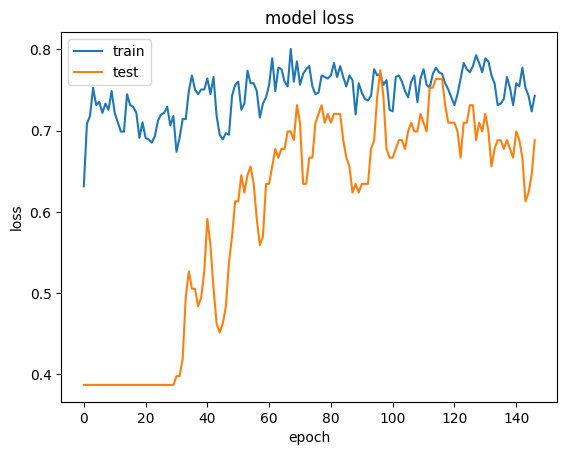

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

graph_info = create_graph_info(df_new, data)

gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="attention",
    combination_type="concat",
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

Edges shape: (2, 102778)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[0.9619766  0.03802339]
 [0.50604504 0.49395496]
 [0.9265864  0.07341357]], shape=(3, 2), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (768, 32)                 2944      
                                                                 
 graph_conv1 (GraphConvLaye  multiple                  13440     
 r)                                                              
                                                                 
 graph_conv2 (GraphConvLaye  multiple                  13440     
 r)                                                              
                                                                 
 postprocess (Sequential)    (768, 32)                 4576      
                                                                 
 logits

In [ ]:
x_train = train.index.to_numpy()
history = run_experiment(gnn_model, x_train, train.Outcome)

Epoch 1/300
3/3 [==============================] - 12s 629ms/step - loss: 0.7131 - acc: 0.5720 - val_loss: 1.1683 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 1s 195ms/step - loss: 0.5807 - acc: 0.7332 - val_loss: 0.7616 - val_acc: 0.4301
Epoch 3/300
3/3 [==============================] - 1s 188ms/step - loss: 0.5628 - acc: 0.7351 - val_loss: 0.7183 - val_acc: 0.3978
Epoch 4/300
3/3 [==============================] - 0s 173ms/step - loss: 0.5427 - acc: 0.7217 - val_loss: 0.7544 - val_acc: 0.3978
Epoch 5/300
3/3 [==============================] - 0s 172ms/step - loss: 0.5432 - acc: 0.7140 - val_loss: 0.9370 - val_acc: 0.3871
Epoch 6/300
3/3 [==============================] - 0s 183ms/step - loss: 0.5543 - acc: 0.6852 - val_loss: 1.3340 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 1s 187ms/step - loss: 0.5353 - acc: 0.7121 - val_loss: 1.5216 - val_acc: 0.3871
Epoch 8/300
3/3 [==============================] - 1s 189ms/step - loss: 0.5141 - 

In [ ]:
y_pred = gnn_model.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))


5/5 [==============================] - 1s 29ms/step
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        85
           1       0.78      0.62      0.69        69

    accuracy                           0.75       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.76      0.75      0.75       154



In [ ]:

graph_info = create_graph_info(df_new, data)

gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="mean",
    combination_type="concat",
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

Edges shape: (2, 102778)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[9.9301046e-01 6.9895731e-03]
 [9.9986732e-01 1.3262927e-04]
 [9.9997306e-01 2.6883381e-05]], shape=(3, 2), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (768, 32)                 2944      
                                                                 
 graph_conv1 (GraphConvLaye  multiple                  11328     
 r)                                                              
                                                                 
 graph_conv2 (GraphConvLaye  multiple                  11328     
 r)                                                              
                                                                 
 postprocess (Sequential)    (768, 32)                 4576      
                                                       

In [ ]:
x_train = train.index.to_numpy()
history = run_experiment(gnn_model, x_train, train.Outcome)

Epoch 1/300
3/3 [==============================] - 11s 414ms/step - loss: 0.7812 - acc: 0.6142 - val_loss: 3.6322 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 0s 71ms/step - loss: 0.6590 - acc: 0.7006 - val_loss: 2.5183 - val_acc: 0.3871
Epoch 3/300
3/3 [==============================] - 0s 60ms/step - loss: 0.5877 - acc: 0.7274 - val_loss: 1.1865 - val_acc: 0.3871
Epoch 4/300
3/3 [==============================] - 0s 72ms/step - loss: 0.5709 - acc: 0.7179 - val_loss: 0.8072 - val_acc: 0.4516
Epoch 5/300
3/3 [==============================] - 0s 58ms/step - loss: 0.5737 - acc: 0.7313 - val_loss: 1.2062 - val_acc: 0.3871
Epoch 6/300
3/3 [==============================] - 0s 71ms/step - loss: 0.5449 - acc: 0.7255 - val_loss: 1.6672 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 0s 66ms/step - loss: 0.5283 - acc: 0.7236 - val_loss: 1.9592 - val_acc: 0.3871
Epoch 8/300
3/3 [==============================] - 0s 72ms/step - loss: 0.5255 - acc: 0.

In [ ]:
y_pred = gnn_model.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))


5/5 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        97
           1       0.71      0.68      0.70        57

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



In [ ]:

graph_info = create_graph_info(df_new, data)

gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="mean",
    combination_type="gru",
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

Edges shape: (2, 102778)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[1.4830781e-04 9.9985170e-01]
 [5.3471955e-03 9.9465275e-01]
 [1.5165855e-05 9.9998486e-01]], shape=(3, 2), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (768, 32)                 2944      
                                                                 
 graph_conv1 (GraphConvLaye  multiple                  10912     
 r)                                                              
                                                                 
 graph_conv2 (GraphConvLaye  multiple                  10912     
 r)                                                              
                                                                 
 postprocess (Sequential)    (768, 32)                 4576      
                                                       

In [ ]:
x_train = train.index.to_numpy()
history = run_experiment(gnn_model, x_train, train.Outcome)

Epoch 1/300
3/3 [==============================] - 16s 535ms/step - loss: 0.7430 - acc: 0.6315 - val_loss: 2.6696 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 0s 67ms/step - loss: 0.6277 - acc: 0.7217 - val_loss: 1.2221 - val_acc: 0.3871
Epoch 3/300
3/3 [==============================] - 0s 71ms/step - loss: 0.5742 - acc: 0.7274 - val_loss: 0.6830 - val_acc: 0.5484
Epoch 4/300
3/3 [==============================] - 0s 63ms/step - loss: 0.5887 - acc: 0.7006 - val_loss: 0.8825 - val_acc: 0.4301
Epoch 5/300
3/3 [==============================] - 0s 64ms/step - loss: 0.5795 - acc: 0.7140 - val_loss: 1.5415 - val_acc: 0.3871
Epoch 6/300
3/3 [==============================] - 0s 63ms/step - loss: 0.5544 - acc: 0.6967 - val_loss: 2.2759 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 0s 61ms/step - loss: 0.5185 - acc: 0.7255 - val_loss: 2.7098 - val_acc: 0.3871
Epoch 8/300
3/3 [==============================] - 0s 66ms/step - loss: 0.5181 - acc: 0.

In [ ]:
y_pred = gnn_model.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))


5/5 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        79
           1       0.85      0.63      0.72        75

    accuracy                           0.77       154
   macro avg       0.79      0.76      0.76       154
weighted avg       0.78      0.77      0.76       154



In [ ]:

graph_info = create_graph_info(df_new, data)

gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="sum",
    combination_type="gru",
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

Edges shape: (2, 102778)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[4.3929663e-01 5.6070340e-01]
 [1.9151956e-02 9.8084807e-01]
 [8.7051123e-04 9.9912947e-01]], shape=(3, 2), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (768, 32)                 2944      
                                                                 
 graph_conv1 (GraphConvLaye  multiple                  10912     
 r)                                                              
                                                                 
 graph_conv2 (GraphConvLaye  multiple                  10912     
 r)                                                              
                                                                 
 postprocess (Sequential)    (768, 32)                 4576      
                                                       

In [ ]:
x_train = train.index.to_numpy()
history = run_experiment(gnn_model, x_train, train.Outcome)

Epoch 1/300
3/3 [==============================] - 12s 529ms/step - loss: 0.7384 - acc: 0.5605 - val_loss: 2.2024 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 0s 70ms/step - loss: 0.6941 - acc: 0.6814 - val_loss: 1.4235 - val_acc: 0.3871
Epoch 3/300
3/3 [==============================] - 0s 67ms/step - loss: 0.5942 - acc: 0.7044 - val_loss: 0.8027 - val_acc: 0.3763
Epoch 4/300
3/3 [==============================] - 0s 73ms/step - loss: 0.5579 - acc: 0.6910 - val_loss: 0.7364 - val_acc: 0.4946
Epoch 5/300
3/3 [==============================] - 0s 61ms/step - loss: 0.5603 - acc: 0.6948 - val_loss: 0.8431 - val_acc: 0.4516
Epoch 6/300
3/3 [==============================] - 0s 65ms/step - loss: 0.5620 - acc: 0.7006 - val_loss: 1.6118 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 0s 60ms/step - loss: 0.5604 - acc: 0.7083 - val_loss: 2.5190 - val_acc: 0.3871
Epoch 8/300
3/3 [==============================] - 0s 58ms/step - loss: 0.5333 - acc: 0.

In [ ]:
y_pred = gnn_model.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))


5/5 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

           0       0.01      1.00      0.02         1
           1       1.00      0.36      0.53       153

    accuracy                           0.36       154
   macro avg       0.51      0.68      0.27       154
weighted avg       0.99      0.36      0.53       154



In [ ]:

graph_info = create_graph_info(df_new, data)

gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="sum",
    combination_type="concat",
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

Edges shape: (2, 102778)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[2.2472849e-02 9.7752714e-01]
 [3.2410752e-02 9.6758926e-01]
 [8.4972045e-05 9.9991500e-01]], shape=(3, 2), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (768, 32)                 2944      
                                                                 
 graph_conv1 (GraphConvLaye  multiple                  11328     
 r)                                                              
                                                                 
 graph_conv2 (GraphConvLaye  multiple                  11328     
 r)                                                              
                                                                 
 postprocess (Sequential)    (768, 32)                 4576      
                                                       

In [ ]:
x_train = train.index.to_numpy()
history = run_experiment(gnn_model, x_train, train.Outcome)

Epoch 1/300
3/3 [==============================] - 13s 499ms/step - loss: 0.8181 - acc: 0.5317 - val_loss: 1.3533 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 0s 89ms/step - loss: 0.5660 - acc: 0.7390 - val_loss: 0.8663 - val_acc: 0.4086
Epoch 3/300
3/3 [==============================] - 0s 78ms/step - loss: 0.5736 - acc: 0.7524 - val_loss: 0.8080 - val_acc: 0.3871
Epoch 4/300
3/3 [==============================] - 0s 85ms/step - loss: 0.4934 - acc: 0.7831 - val_loss: 0.7624 - val_acc: 0.5161
Epoch 5/300
3/3 [==============================] - 0s 70ms/step - loss: 0.4800 - acc: 0.7812 - val_loss: 0.8481 - val_acc: 0.4409
Epoch 6/300
3/3 [==============================] - 0s 68ms/step - loss: 0.3801 - acc: 0.8330 - val_loss: 1.0129 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 0s 68ms/step - loss: 0.3116 - acc: 0.8733 - val_loss: 1.0012 - val_acc: 0.3871
Epoch 8/300
3/3 [==============================] - 0s 73ms/step - loss: 0.2385 - acc: 0.

In [ ]:
y_pred = gnn_model.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))


5/5 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       130
           1       0.36      0.83      0.51        24

    accuracy                           0.75       154
   macro avg       0.66      0.78      0.67       154
weighted avg       0.87      0.75      0.78       154



# User - User - Symptom

In [ ]:
df_new2

,index source,index target
0,426,682
1,426,607
2,426,354
3,426,331
4,426,483
...,...,...
30239,115,666
30240,115,129
30241,221,666
30242,221,129


In [ ]:

from itertools import product

graph_info_new = create_graph_info(df_new2, data)

gnn_model_2 = GNNNodeClassifier(
    graph_info=graph_info_new,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="attention",
    combination_type="gru",
    name="gnn_model",
)

print("GNN output shape:", gnn_model_2([1, 10, 100]))

Edges shape: (2, 30244)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[0.9527273  0.04727272]
 [0.7094041  0.2905959 ]
 [0.794106   0.20589396]], shape=(3, 2), dtype=float32)


In [ ]:

x_train = train.index.to_numpy()
history = run_experiment(gnn_model_2, x_train, train.Outcome)


Epoch 1/300
3/3 [==============================] - 16s 712ms/step - loss: 0.7714 - acc: 0.6430 - val_loss: 1.6070 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 0s 76ms/step - loss: 0.6206 - acc: 0.7025 - val_loss: 1.4649 - val_acc: 0.3871
Epoch 3/300
3/3 [==============================] - 0s 67ms/step - loss: 0.6299 - acc: 0.6910 - val_loss: 1.2306 - val_acc: 0.3871
Epoch 4/300
3/3 [==============================] - 0s 66ms/step - loss: 0.5722 - acc: 0.6871 - val_loss: 1.2904 - val_acc: 0.3871
Epoch 5/300
3/3 [==============================] - 0s 67ms/step - loss: 0.5980 - acc: 0.6871 - val_loss: 1.4546 - val_acc: 0.3871
Epoch 6/300
3/3 [==============================] - 0s 64ms/step - loss: 0.5666 - acc: 0.7025 - val_loss: 1.5872 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 0s 68ms/step - loss: 0.5206 - acc: 0.7332 - val_loss: 1.7006 - val_acc: 0.3871
Epoch 8/300
3/3 [==============================] - 0s 67ms/step - loss: 0.5246 - acc: 0.

In [ ]:
y_pred = gnn_model_2.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))

5/5 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        87
           1       0.78      0.64      0.70        67

    accuracy                           0.77       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.77      0.77      0.76       154



In [ ]:

from itertools import product

graph_info_new = create_graph_info(df_new2, data)

gnn_model_2 = GNNNodeClassifier(
    graph_info=graph_info_new,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="attention",
    combination_type="concat",
    name="gnn_model",
)

print("GNN output shape:", gnn_model_2([1, 10, 100]))

Edges shape: (2, 30244)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[3.4870682e-05 9.9996507e-01]
 [1.3004332e-07 9.9999988e-01]
 [4.4624087e-09 1.0000000e+00]], shape=(3, 2), dtype=float32)


In [ ]:

x_train = train.index.to_numpy()
history = run_experiment(gnn_model_2, x_train, train.Outcome)


Epoch 1/300
3/3 [==============================] - 10s 504ms/step - loss: 0.6410 - acc: 0.6507 - val_loss: 3.8529 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 0s 86ms/step - loss: 0.6095 - acc: 0.7217 - val_loss: 1.4363 - val_acc: 0.3871
Epoch 3/300
3/3 [==============================] - 0s 79ms/step - loss: 0.5307 - acc: 0.7332 - val_loss: 0.9517 - val_acc: 0.3871
Epoch 4/300
3/3 [==============================] - 0s 74ms/step - loss: 0.5185 - acc: 0.7274 - val_loss: 1.2421 - val_acc: 0.3871
Epoch 5/300
3/3 [==============================] - 0s 74ms/step - loss: 0.5374 - acc: 0.7217 - val_loss: 1.9005 - val_acc: 0.3871
Epoch 6/300
3/3 [==============================] - 0s 77ms/step - loss: 0.5220 - acc: 0.7409 - val_loss: 2.6705 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 0s 74ms/step - loss: 0.5447 - acc: 0.7313 - val_loss: 2.6418 - val_acc: 0.3871
Epoch 8/300
3/3 [==============================] - 0s 73ms/step - loss: 0.5438 - acc: 0.

In [ ]:
y_pred = gnn_model_2.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))

5/5 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        79
           1       0.84      0.61      0.71        75

    accuracy                           0.75       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.77      0.75      0.75       154



In [ ]:

from itertools import product

graph_info_new = create_graph_info(df_new2, data)

gnn_model_2 = GNNNodeClassifier(
    graph_info=graph_info_new,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="mean",
    combination_type="concat",
    name="gnn_model",
)

print("GNN output shape:", gnn_model_2([1, 10, 100]))

Edges shape: (2, 30244)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[0.99628544 0.00371457]
 [0.94515735 0.05484268]
 [0.99315107 0.00684895]], shape=(3, 2), dtype=float32)


In [ ]:

x_train = train.index.to_numpy()
history = run_experiment(gnn_model_2, x_train, train.Outcome)


Epoch 1/300
3/3 [==============================] - 10s 316ms/step - loss: 0.7517 - acc: 0.6660 - val_loss: 3.9395 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 0s 36ms/step - loss: 0.7006 - acc: 0.6718 - val_loss: 2.9609 - val_acc: 0.3871
Epoch 3/300
3/3 [==============================] - 0s 43ms/step - loss: 0.5771 - acc: 0.7332 - val_loss: 2.7785 - val_acc: 0.3871
Epoch 4/300
3/3 [==============================] - 0s 56ms/step - loss: 0.5442 - acc: 0.7505 - val_loss: 2.6974 - val_acc: 0.3871
Epoch 5/300
3/3 [==============================] - 0s 44ms/step - loss: 0.6354 - acc: 0.6987 - val_loss: 2.6579 - val_acc: 0.3871
Epoch 6/300
3/3 [==============================] - 0s 51ms/step - loss: 0.6034 - acc: 0.6967 - val_loss: 2.1900 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 0s 51ms/step - loss: 0.5585 - acc: 0.7332 - val_loss: 1.8743 - val_acc: 0.3871
Epoch 8/300
3/3 [==============================] - 0s 43ms/step - loss: 0.5218 - acc: 0.

In [ ]:
y_pred = gnn_model_2.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))


5/5 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       120
           1       0.49      0.79      0.61        34

    accuracy                           0.77       154
   macro avg       0.71      0.78      0.72       154
weighted avg       0.83      0.77      0.79       154



In [ ]:

from itertools import product

graph_info_new = create_graph_info(df_new2, data)

gnn_model_2 = GNNNodeClassifier(
    graph_info=graph_info_new,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="mean",
    combination_type="gru",
    name="gnn_model",
)

print("GNN output shape:", gnn_model_2([1, 10, 100]))

Edges shape: (2, 30244)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[2.2448505e-04 9.9977547e-01]
 [5.7291465e-05 9.9994266e-01]
 [2.4102521e-05 9.9997592e-01]], shape=(3, 2), dtype=float32)


In [ ]:

x_train = train.index.to_numpy()
history = run_experiment(gnn_model_2, x_train, train.Outcome)


Epoch 1/300
3/3 [==============================] - 12s 475ms/step - loss: 0.7691 - acc: 0.5585 - val_loss: 5.2305 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 0s 38ms/step - loss: 0.6116 - acc: 0.7063 - val_loss: 3.4841 - val_acc: 0.3871
Epoch 3/300
3/3 [==============================] - 0s 39ms/step - loss: 0.6109 - acc: 0.7006 - val_loss: 2.6657 - val_acc: 0.3871
Epoch 4/300
3/3 [==============================] - 0s 38ms/step - loss: 0.5772 - acc: 0.6852 - val_loss: 2.8598 - val_acc: 0.3871
Epoch 5/300
3/3 [==============================] - 0s 47ms/step - loss: 0.5890 - acc: 0.6967 - val_loss: 3.1571 - val_acc: 0.3871
Epoch 6/300
3/3 [==============================] - 0s 38ms/step - loss: 0.5927 - acc: 0.6891 - val_loss: 2.9911 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 0s 38ms/step - loss: 0.5856 - acc: 0.7083 - val_loss: 2.7664 - val_acc: 0.3871
Epoch 8/300
3/3 [==============================] - 0s 37ms/step - loss: 0.5686 - acc: 0.

In [ ]:
y_pred = gnn_model_2.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))


5/5 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.68      0.89      0.77        75
           1       0.85      0.59      0.70        79

    accuracy                           0.74       154
   macro avg       0.77      0.74      0.74       154
weighted avg       0.77      0.74      0.73       154



In [ ]:

from itertools import product

graph_info_new = create_graph_info(df_new2, data)

gnn_model_2 = GNNNodeClassifier(
    graph_info=graph_info_new,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="mean",
    combination_type="concat",
    name="gnn_model",
)

print("GNN output shape:", gnn_model_2([1, 10, 100]))

Edges shape: (2, 30244)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[9.9997342e-01 2.6543268e-05]
 [9.9999964e-01 3.8646510e-07]
 [1.0000000e+00 1.1432990e-09]], shape=(3, 2), dtype=float32)


In [ ]:

x_train = train.index.to_numpy()
history = run_experiment(gnn_model_2, x_train, train.Outcome)


Epoch 1/300
3/3 [==============================] - 10s 432ms/step - loss: 0.8185 - acc: 0.5605 - val_loss: 2.7655 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 0s 42ms/step - loss: 0.7063 - acc: 0.7006 - val_loss: 2.0284 - val_acc: 0.3871
Epoch 3/300
3/3 [==============================] - 0s 40ms/step - loss: 0.6005 - acc: 0.7063 - val_loss: 1.2823 - val_acc: 0.3871
Epoch 4/300
3/3 [==============================] - 0s 55ms/step - loss: 0.5830 - acc: 0.7006 - val_loss: 1.1196 - val_acc: 0.3871
Epoch 5/300
3/3 [==============================] - 0s 42ms/step - loss: 0.5639 - acc: 0.7006 - val_loss: 1.1412 - val_acc: 0.3871
Epoch 6/300
3/3 [==============================] - 0s 34ms/step - loss: 0.5379 - acc: 0.7159 - val_loss: 1.2309 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 0s 33ms/step - loss: 0.5360 - acc: 0.7236 - val_loss: 1.3394 - val_acc: 0.3871
Epoch 8/300
3/3 [==============================] - 0s 33ms/step - loss: 0.5644 - acc: 0.

In [ ]:

y_pred = gnn_model_2.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))


5/5 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       1.00      0.67      0.80       147
           1       0.13      1.00      0.23         7

    accuracy                           0.69       154
   macro avg       0.56      0.84      0.52       154
weighted avg       0.96      0.69      0.78       154



In [ ]:

from itertools import product

graph_info_new = create_graph_info(df_new2, data)

gnn_model_2 = GNNNodeClassifier(
    graph_info=graph_info_new,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="sum",
    combination_type="concat",
    name="gnn_model",
)

print("GNN output shape:", gnn_model_2([1, 10, 100]))

Edges shape: (2, 30244)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[2.7874455e-01 7.2125542e-01]
 [7.5749218e-01 2.4250785e-01]
 [9.9997234e-01 2.7702947e-05]], shape=(3, 2), dtype=float32)


In [ ]:

x_train = train.index.to_numpy()
history = run_experiment(gnn_model_2, x_train, train.Outcome)


Epoch 1/300
3/3 [==============================] - 11s 315ms/step - loss: 0.8849 - acc: 0.5662 - val_loss: 3.7538 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 0s 34ms/step - loss: 0.6824 - acc: 0.6603 - val_loss: 2.3173 - val_acc: 0.3871
Epoch 3/300
3/3 [==============================] - 0s 35ms/step - loss: 0.5827 - acc: 0.7198 - val_loss: 1.9731 - val_acc: 0.3871
Epoch 4/300
3/3 [==============================] - 0s 38ms/step - loss: 0.5295 - acc: 0.7582 - val_loss: 1.9809 - val_acc: 0.3871
Epoch 5/300
3/3 [==============================] - 0s 35ms/step - loss: 0.5628 - acc: 0.7524 - val_loss: 1.9928 - val_acc: 0.3871
Epoch 6/300
3/3 [==============================] - 0s 34ms/step - loss: 0.5585 - acc: 0.7274 - val_loss: 2.0457 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 0s 34ms/step - loss: 0.5032 - acc: 0.7351 - val_loss: 2.2526 - val_acc: 0.3871
Epoch 8/300
3/3 [==============================] - 0s 41ms/step - loss: 0.4520 - acc: 0.

In [ ]:

y_pred = gnn_model_2.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))


5/5 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       131
           1       0.35      0.83      0.49        23

    accuracy                           0.74       154
   macro avg       0.65      0.78      0.66       154
weighted avg       0.87      0.74      0.78       154



In [ ]:

from itertools import product

graph_info_new = create_graph_info(df_new2, data)

gnn_model_2 = GNNNodeClassifier(
    graph_info=graph_info_new,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="sum",
    combination_type="gru",
    name="gnn_model",
)

print("GNN output shape:", gnn_model_2([1, 10, 100]))

Edges shape: (2, 30244)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[2.3029339e-05 9.9997699e-01]
 [2.0000985e-09 1.0000000e+00]
 [1.0160133e-11 1.0000000e+00]], shape=(3, 2), dtype=float32)


In [ ]:

x_train = train.index.to_numpy()
history = run_experiment(gnn_model_2, x_train, train.Outcome)


Epoch 1/300
3/3 [==============================] - 11s 476ms/step - loss: 0.6996 - acc: 0.5816 - val_loss: 2.4186 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 0s 38ms/step - loss: 0.6162 - acc: 0.7198 - val_loss: 1.6182 - val_acc: 0.3871
Epoch 3/300
3/3 [==============================] - 0s 39ms/step - loss: 0.5837 - acc: 0.7447 - val_loss: 1.1139 - val_acc: 0.3871
Epoch 4/300
3/3 [==============================] - 0s 39ms/step - loss: 0.5448 - acc: 0.7274 - val_loss: 1.0305 - val_acc: 0.3871
Epoch 5/300
3/3 [==============================] - 0s 43ms/step - loss: 0.5724 - acc: 0.7102 - val_loss: 1.2239 - val_acc: 0.3871
Epoch 6/300
3/3 [==============================] - 0s 36ms/step - loss: 0.5512 - acc: 0.7044 - val_loss: 1.6443 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 0s 42ms/step - loss: 0.5547 - acc: 0.7102 - val_loss: 1.8530 - val_acc: 0.3871
Epoch 8/300
3/3 [==============================] - 0s 35ms/step - loss: 0.5437 - acc: 0.

In [ ]:

y_pred = gnn_model_2.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))


5/5 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.60      0.84      0.70        70
           1       0.80      0.52      0.63        84

    accuracy                           0.67       154
   macro avg       0.70      0.68      0.67       154
weighted avg       0.71      0.67      0.66       154



# Xây dựng trên độ tương đồng

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

df_test = train.drop(['Outcome', 'Age Range'], axis = 1).copy()
cosine_sim = cosine_similarity(df_test)

# Tạo DataFrame mới với cặp index thỏa điều kiện
indices = train['index'].tolist()
pairs = []
for i in range(len(cosine_sim)):
    for j in range(i + 1, len(cosine_sim[i])):
        if cosine_sim[i, j] >= 0.8:
            pairs.append((indices[i], indices[j]))

df_pairs = pd.DataFrame(pairs, columns=['index source', 'index target'])
# sampled_df = df_pairs.sample(frac=0.5, random_state=42)

In [ ]:
df_pairs

,index source,index target
0,663,712
1,663,161
2,663,509
3,663,305
4,663,426
...,...,...
130940,144,715
130941,645,715
130942,715,235
130943,72,235


In [ ]:
graph_info_new = create_graph_info(df_pairs, data)

gnn_model_3 = GNNNodeClassifier(
    graph_info=graph_info_new,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="attention",
    combination_type="gru",
    name="gnn_model",
)

print("GNN output shape:", gnn_model_3([1, 10, 100]))

Edges shape: (2, 130945)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[1.0000000e+00 1.2479301e-09]
 [1.0000000e+00 8.7777476e-12]
 [1.0000000e+00 1.1068828e-14]], shape=(3, 2), dtype=float32)


In [ ]:
x_train = train.index.to_numpy()
history = run_experiment(gnn_model_3, x_train, train.Outcome)


Epoch 1/300
3/3 [==============================] - 13s 673ms/step - loss: 0.7720 - acc: 0.6507 - val_loss: 3.9135 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 1s 194ms/step - loss: 0.7130 - acc: 0.6929 - val_loss: 2.8814 - val_acc: 0.3871
Epoch 3/300
3/3 [==============================] - 1s 197ms/step - loss: 0.6308 - acc: 0.6679 - val_loss: 1.7322 - val_acc: 0.3871
Epoch 4/300
3/3 [==============================] - 1s 194ms/step - loss: 0.5307 - acc: 0.7102 - val_loss: 1.3928 - val_acc: 0.3871
Epoch 5/300
3/3 [==============================] - 1s 194ms/step - loss: 0.6010 - acc: 0.7083 - val_loss: 1.5325 - val_acc: 0.3871
Epoch 6/300
3/3 [==============================] - 1s 194ms/step - loss: 0.6047 - acc: 0.7044 - val_loss: 2.0322 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 1s 197ms/step - loss: 0.5540 - acc: 0.7102 - val_loss: 2.5563 - val_acc: 0.3871
Epoch 8/300
3/3 [==============================] - 1s 206ms/step - loss: 0.5360 - 

In [ ]:

y_pred = gnn_model_3.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))

5/5 [==============================] - 1s 43ms/step
              precision    recall  f1-score   support

           0       0.71      0.90      0.79        78
           1       0.85      0.62      0.72        76

    accuracy                           0.76       154
   macro avg       0.78      0.76      0.75       154
weighted avg       0.78      0.76      0.75       154



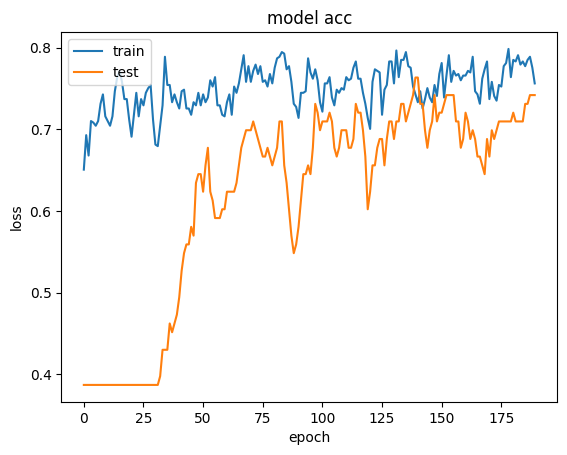

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
graph_info_new = create_graph_info(df_pairs, data)

gnn_model_3 = GNNNodeClassifier(
    graph_info=graph_info_new,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="mean",
    combination_type="concat",
    name="gnn_model",
)

print("GNN output shape:", gnn_model_3([1, 10, 100]))

Edges shape: (2, 130945)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[7.6295236e-13 1.0000000e+00]
 [5.1095564e-12 1.0000000e+00]
 [3.2394362e-16 1.0000000e+00]], shape=(3, 2), dtype=float32)


In [ ]:
x_train = train.index.to_numpy()
history = run_experiment(gnn_model_3, x_train, train.Outcome)

Epoch 1/300
3/3 [==============================] - 14s 953ms/step - loss: 0.8307 - acc: 0.5566 - val_loss: 1.7400 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 0s 89ms/step - loss: 0.6920 - acc: 0.7102 - val_loss: 2.3007 - val_acc: 0.3871
Epoch 3/300
3/3 [==============================] - 0s 89ms/step - loss: 0.6534 - acc: 0.6814 - val_loss: 2.3408 - val_acc: 0.3871
Epoch 4/300
3/3 [==============================] - 0s 82ms/step - loss: 0.5692 - acc: 0.6948 - val_loss: 1.6774 - val_acc: 0.3871
Epoch 5/300
3/3 [==============================] - 0s 85ms/step - loss: 0.6181 - acc: 0.6871 - val_loss: 1.4510 - val_acc: 0.3871
Epoch 6/300
3/3 [==============================] - 0s 96ms/step - loss: 0.6511 - acc: 0.6583 - val_loss: 1.6551 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 0s 104ms/step - loss: 0.5593 - acc: 0.7159 - val_loss: 2.1054 - val_acc: 0.3871
Epoch 8/300
3/3 [==============================] - 0s 131ms/step - loss: 0.5710 - acc: 

In [ ]:
y_pred = gnn_model_3.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))

5/5 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

           0       0.72      0.87      0.78        82
           1       0.80      0.61      0.69        72

    accuracy                           0.75       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.76      0.75      0.74       154



In [ ]:
graph_info_new = create_graph_info(df_pairs, data)

gnn_model_3 = GNNNodeClassifier(
    graph_info=graph_info_new,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="sum",
    combination_type="concat",
    name="gnn_model",
)

print("GNN output shape:", gnn_model_3([1, 10, 100]))

Edges shape: (2, 130945)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[9.9977547e-01 2.2454777e-04]
 [9.9916601e-01 8.3396141e-04]
 [9.9999952e-01 5.2980670e-07]], shape=(3, 2), dtype=float32)


In [ ]:
x_train = train.index.to_numpy()
history = run_experiment(gnn_model_3, x_train, train.Outcome)

Epoch 1/300
3/3 [==============================] - 10s 503ms/step - loss: 0.8338 - acc: 0.6526 - val_loss: 5.7374 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 0s 89ms/step - loss: 0.7131 - acc: 0.6871 - val_loss: 3.4715 - val_acc: 0.3871
Epoch 3/300
3/3 [==============================] - 0s 86ms/step - loss: 0.5470 - acc: 0.7370 - val_loss: 2.2490 - val_acc: 0.3871
Epoch 4/300
3/3 [==============================] - 0s 84ms/step - loss: 0.5895 - acc: 0.7140 - val_loss: 2.8170 - val_acc: 0.3871
Epoch 5/300
3/3 [==============================] - 0s 75ms/step - loss: 0.5921 - acc: 0.7294 - val_loss: 3.4622 - val_acc: 0.3871
Epoch 6/300
3/3 [==============================] - 0s 74ms/step - loss: 0.5374 - acc: 0.7332 - val_loss: 3.3269 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 0s 77ms/step - loss: 0.5652 - acc: 0.7255 - val_loss: 2.9747 - val_acc: 0.3871
Epoch 8/300
3/3 [==============================] - 0s 80ms/step - loss: 0.5337 - acc: 0.

In [ ]:
y_pred = gnn_model_3.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))

5/5 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

           0       0.69      0.89      0.78        76
           1       0.85      0.60      0.71        78

    accuracy                           0.75       154
   macro avg       0.77      0.75      0.74       154
weighted avg       0.77      0.75      0.74       154



In [ ]:
graph_info_new = create_graph_info(df_pairs, data)

gnn_model_3 = GNNNodeClassifier(
    graph_info=graph_info_new,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="sum",
    combination_type="gru",
    name="gnn_model",
)

print("GNN output shape:", gnn_model_3([1, 10, 100]))

Edges shape: (2, 130945)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[3.4152402e-04 9.9965847e-01]
 [3.9607567e-05 9.9996042e-01]
 [9.3649560e-06 9.9999058e-01]], shape=(3, 2), dtype=float32)


In [ ]:
x_train = train.index.to_numpy()
history = run_experiment(gnn_model_3, x_train, train.Outcome)

Epoch 1/300
3/3 [==============================] - 19s 830ms/step - loss: 0.7231 - acc: 0.5739 - val_loss: 1.2580 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 0s 94ms/step - loss: 0.5941 - acc: 0.7294 - val_loss: 0.7953 - val_acc: 0.3871
Epoch 3/300
3/3 [==============================] - 0s 99ms/step - loss: 0.5486 - acc: 0.7428 - val_loss: 0.9317 - val_acc: 0.3871
Epoch 4/300
3/3 [==============================] - 0s 110ms/step - loss: 0.5245 - acc: 0.7562 - val_loss: 1.2261 - val_acc: 0.3871
Epoch 5/300
3/3 [==============================] - 0s 88ms/step - loss: 0.5973 - acc: 0.7063 - val_loss: 1.3807 - val_acc: 0.3871
Epoch 6/300
3/3 [==============================] - 0s 96ms/step - loss: 0.5687 - acc: 0.7217 - val_loss: 1.2991 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 0s 109ms/step - loss: 0.5635 - acc: 0.7063 - val_loss: 1.2016 - val_acc: 0.3763
Epoch 8/300
3/3 [==============================] - 0s 104ms/step - loss: 0.5848 - acc:

In [ ]:
y_pred = gnn_model_3.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))

5/5 [==============================] - 1s 17ms/step
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        84
           1       0.82      0.64      0.72        70

    accuracy                           0.77       154
   macro avg       0.78      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154



In [ ]:
graph_info_new = create_graph_info(df_pairs, data)

gnn_model_3 = GNNNodeClassifier(
    graph_info=graph_info_new,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="attention",
    combination_type="concat",
    name="gnn_model",
)

print("GNN output shape:", gnn_model_3([1, 10, 100]))

Edges shape: (2, 130945)
Nodes shape: (768, 8)
GNN output shape: tf.Tensor(
[[9.9999070e-01 9.2840892e-06]
 [9.9999702e-01 3.0205526e-06]
 [1.0000000e+00 5.2914911e-10]], shape=(3, 2), dtype=float32)


In [ ]:
x_train = train.index.to_numpy()
history = run_experiment(gnn_model_3, x_train, train.Outcome)

Epoch 1/300
3/3 [==============================] - 12s 655ms/step - loss: 0.7360 - acc: 0.6161 - val_loss: 2.4518 - val_acc: 0.3871
Epoch 2/300
3/3 [==============================] - 1s 206ms/step - loss: 0.6849 - acc: 0.6775 - val_loss: 2.0541 - val_acc: 0.3871
Epoch 3/300
3/3 [==============================] - 1s 197ms/step - loss: 0.5885 - acc: 0.7217 - val_loss: 1.3934 - val_acc: 0.3871
Epoch 4/300
3/3 [==============================] - 1s 194ms/step - loss: 0.5573 - acc: 0.7140 - val_loss: 1.0077 - val_acc: 0.3871
Epoch 5/300
3/3 [==============================] - 1s 193ms/step - loss: 0.5861 - acc: 0.6910 - val_loss: 0.8469 - val_acc: 0.3871
Epoch 6/300
3/3 [==============================] - 1s 206ms/step - loss: 0.5492 - acc: 0.7044 - val_loss: 0.8092 - val_acc: 0.3871
Epoch 7/300
3/3 [==============================] - 1s 196ms/step - loss: 0.5173 - acc: 0.7255 - val_loss: 0.8175 - val_acc: 0.3871
Epoch 8/300
3/3 [==============================] - 1s 195ms/step - loss: 0.5125 - 

In [ ]:
y_pred = gnn_model_3.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Outcome))

5/5 [==============================] - 1s 38ms/step
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        95
           1       0.76      0.71      0.74        59

    accuracy                           0.81       154
   macro avg       0.80      0.79      0.79       154
weighted avg       0.80      0.81      0.80       154

